# Part II - (Ford Go Bike)
## by Lilian Some



## Investigation Overview 

In this investigation, I examined how various variables affect bike trips across the bay area  and how customer characterisitics( age, gender) affect biking outcomes.


## Dataset Overview

The data has information 183412 rides made in a bike-sharing system  in the  San Francisco Bay area.
The outstanding features  include duration in secs, customer type, gender etc

In [24]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [25]:
bike = pd.read_csv('201902-fordgobike-tripdata.csv')

In [26]:
dtype= {'start_time': 'datetime64', 
        'end_time': 'datetime64',
        
        'start_station_id': 'object',
        'end_station_id': 'object',
        
        'start_station_latitude': 'object',
        'start_station_longitude':  'object',
        'end_station_latitude':  'object',
        'end_station_longitude':  'object',
        
        'bike_id': 'object',
        'user_type': 'category'}

bike = bike.astype(dtype)


In [27]:
# Create new columns from start_time  and end_time colums
bike['start_hour'] = bike.start_time.dt.hour
bike['end_hour'] = bike.end_time.dt.hour

bike['start_month'] = bike.start_time.dt.month
bike['end_month']= bike.end_time.dt.month

bike['end_weekday'] = bike.end_time.dt.weekday
bike['start_weekday'] = bike.start_time.dt.weekday

## (Distribution of Popular bike times)


Observation:

The peak time for usage is moning hours ( 8.00 hrs & 9.00 hours) and evening (17.00 hours & 18.00 hrs). This can be to rush hours where people leave for work and come back later in the evening
The lowest usage time is between 0.00hrs to 5.00hrs . This could mean that these are night hours hence low human activity


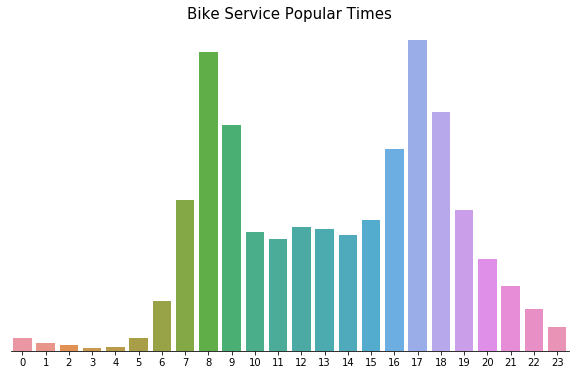

In [28]:
hour_order = np.arange(0,24)

plt.figure(figsize=(10,6))
plt.title('Bike Service Popular Times', fontsize=15)
ax = sb.countplot(data=bike, x='start_hour', order=hour_order)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.yticks([])
plt.ylabel('')
plt.xlabel('')
plt.show()

## Distribution between age and trip duration
Observation:

As most of the durations are below 60000 and age is below 80, lets crop the plot till those values. Based on the correlation, age is slightly negative correlated with duration against of my assumption (age and duration is negatively correlated). However, it actually make sense that in this dataset, the major population of age is between 30 and 40 years old. We have less samples in the older population.



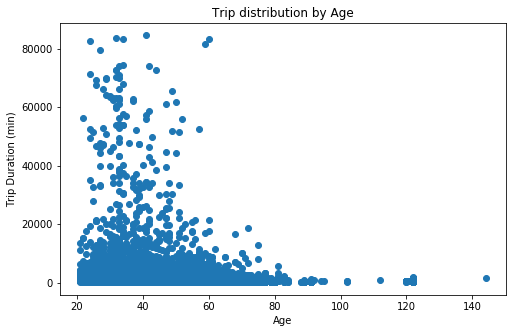

In [22]:
#Distribution between age and trip duration
def age_trip_dist():
    from datetime import datetime
    bike['age'] = datetime.now().year - bike.member_birth_year
    plt.figure(figsize=[8,5])
    plt.scatter(data = bike, x = 'age', y ='duration_sec', alpha= None)
    plt.title('Trip distribution by Age')
    plt.xlabel('Age')
    plt.ylabel('Trip Duration (min)')

age_trip_dist()

## What is the Relationship between trip duration and Gender?

Observation: In all the three genders the time duraion across the week is similar.

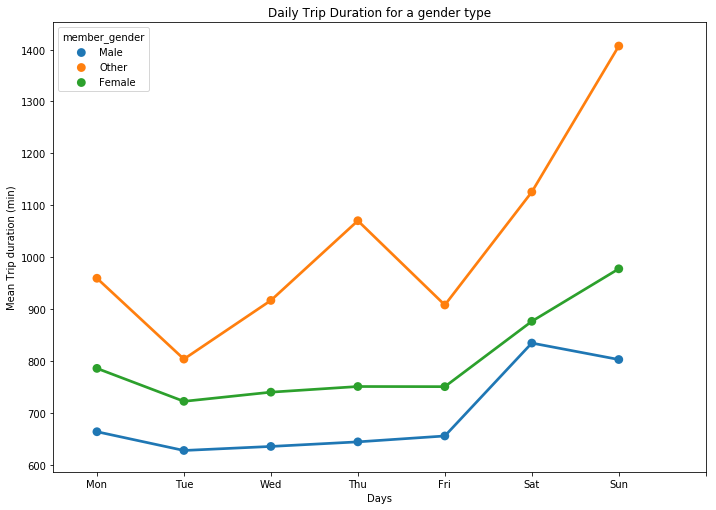

In [23]:
def age_gen_distr():
    plt.figure(figsize=[11.69, 8.27])
    sb.pointplot(data = bike, x = 'start_weekday', y = 'duration_sec', hue = 'member_gender', ci=None)
    plt.title('Daily Trip Duration for a gender type')
    plt.ylabel('Mean Trip duration (min)')
    plt.xlabel('Days')
    plt.xticks(np.arange(0, 7 + 1, 1),weekday_labels)
age_gen_distr()

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_Ford_Go_Bike.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck_Ford_Go_Bike.ipynb to slides
[NbConvertApp] Writing 365445 bytes to Part_II_slide_deck_Ford_Go_Bike.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck_Ford_Go_Bike.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 77